<a href="https://colab.research.google.com/github/surabhi13gupta/Linear-Timeseries-Modelling/blob/main/Project_EDA_Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

Perform Exploratory Data Analysis (EDA) of Retail Sales time series data using visualizations and statistical methods.

## Dataset

The dataset is a French retail company quarterly sales data that has been made available from  Prof. Rob Hyndman's ["Forecasting Methods & Applications"](https://robjhyndman.com/forecasting/) book. There are 24 entries, from 2012-03-31 to 2017-12-31 (Quarterly sales values).

## Introduction

Exploratory data analysis of time series data starts with data visualization.

- Are there consistent patterns?
- Is there a significant trend?
- Is seasonality important?
- Is there evidence of the presence of business cycles?
- Are there any outliers in the data that need to be explained by those with expert knowledge?
- How strong are the relationships among the variables available for analysis?

Various tools have been developed to help with these analyses.

In [1]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/ts_frenchretail.csv

### Importing libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-white')
%matplotlib inline
import scipy
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import signal
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

### Import the Data

In [3]:
df = pd.read_csv("/content/ts_frenchretail.csv", index_col="Date")
df.head()

,Sales
Date,
3/31/2012,362000
6/30/2012,385000
9/30/2012,432000
12/31/2012,341000
3/31/2013,382000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 3/31/2012 to 12/31/2017
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   24 non-null     int64
dtypes: int64(1)
memory usage: 384.0+ bytes


## Exploratory Data Analysis

#### Divide the sales by 1000

Sales numbers are in thousands, so divide by 1000 to make it easier to work with numbers

In [8]:
# YOUR CODE HERE
df["Sales"] = df["Sales"]/1000
df

,Sales
Date,
3/31/2012,0.362
6/30/2012,0.385
9/30/2012,0.432
12/31/2012,0.341
3/31/2013,0.382
6/30/2013,0.409
9/30/2013,0.498
12/31/2013,0.387
3/31/2014,0.473


In [6]:
df.describe()

,Sales
count,24.000000
mean,548.708333
std,140.402675
min,341.000000
25%,426.250000
50%,550.500000
75%,636.250000
max,854.000000


#### Check for missing values     

In [7]:
df.isna().sum()

,0
Sales,0


## Analysis from above:
- No null values
- only 24 entries i.e. Quarterly sales information for 6 years
- mean is around 548 where as min is 341 and max is 854. This shows some trends or seasonality in data.

### **Visualization**

#### Visualize the time series (2012 to 2017)

In [9]:
#Utility helper to plot dataframe
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red', marker="o")
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=90)
    plt.show()

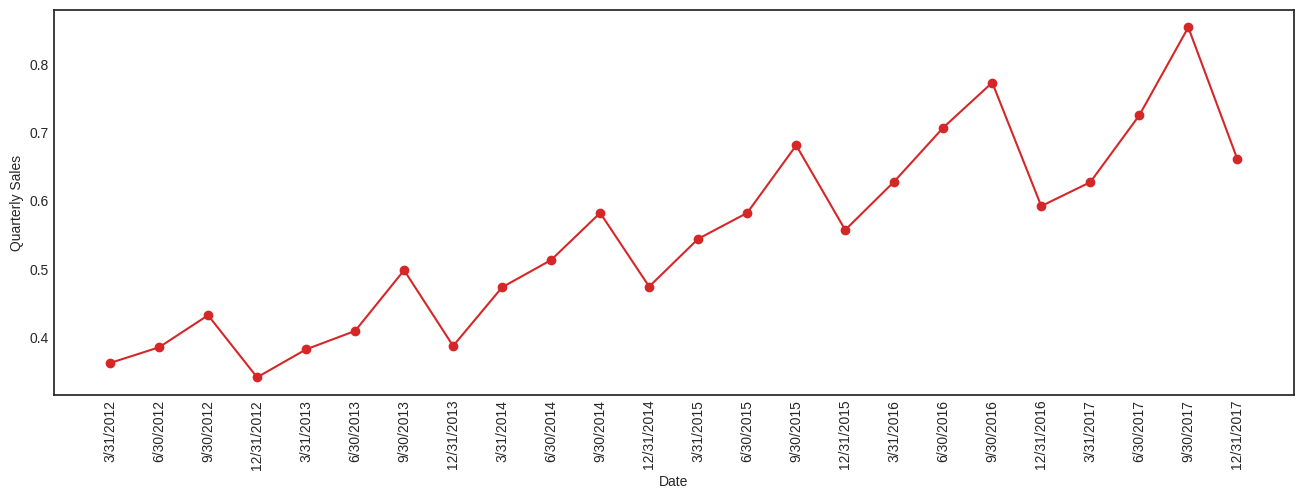

In [10]:
# YOUR CODE HERE
plot_df(df, df.index, df.Sales, ylabel="Quarterly Sales")

#### Visualize the data year-wise and quarter-wise

- Box plot to see distribution of sales in each year
- Create year-wise subplots to visualize the quarterly Sales per year
- Compute Percentage growth each year

Make a report of your observations.

In [12]:
df['year'] = pd.to_datetime(df.index).year
df['quarter'] = pd.to_datetime(df.index).quarter

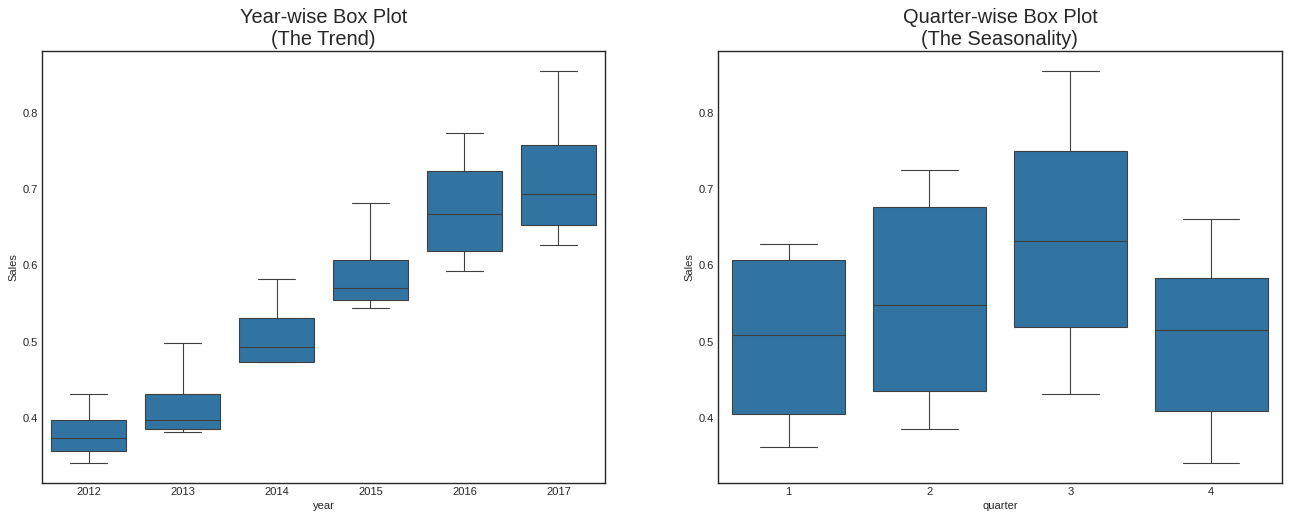

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Sales', data=df, ax=axes[0])
sns.boxplot(x='quarter', y='Sales', data=df, ax=axes[1])

# Set title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Quarter-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

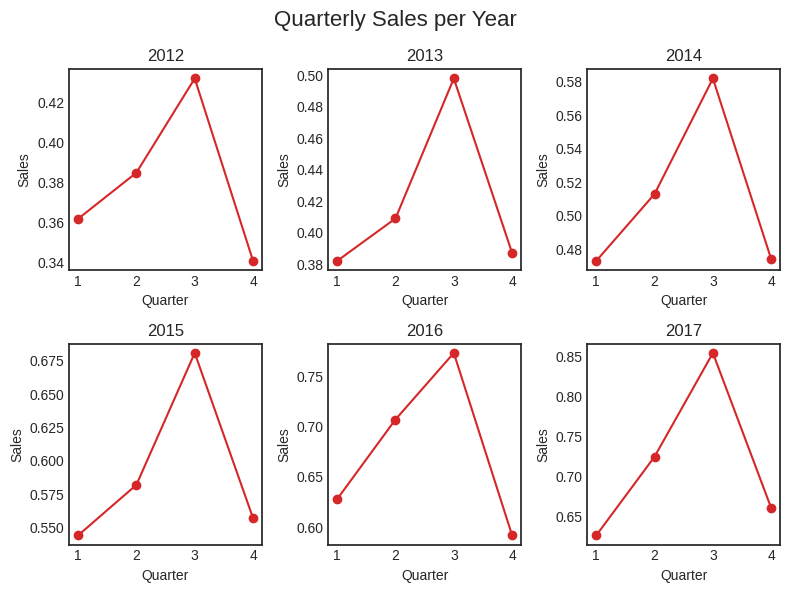

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(8, 6), dpi=100)
fig.suptitle('Quarterly Sales per Year', fontsize=16)

years = df['year'].unique()
for i, year in enumerate(years):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    df_year = df[df['year'] == year]
    ax.plot(df_year['quarter'], df_year['Sales'], color='tab:red', marker="o")
    ax.set_title(f'{year}')
    ax.set_xticks(df_year['quarter'])
    ax.set_xlabel('Quarter')
    ax.set_ylabel('Sales')

plt.tight_layout()
plt.show()


In [15]:
annual_sales = df.groupby('year')['Sales'].sum()
yearly_growth = annual_sales.pct_change() * 100
print("Percentage growth each year:")
yearly_growth

Percentage growth each year:


,Sales
year,
2012,NaN
2013,10.263158
2014,21.837709
2015,15.768854
2016,14.213198
2017,6.185185


<Axes: xlabel='year'>

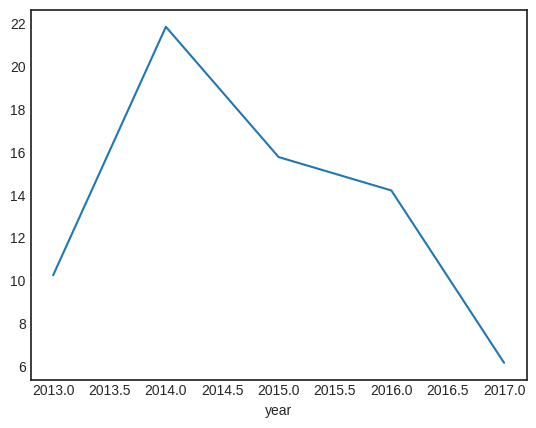

In [ ]:
yearly_growth.dropna().plot()

##Analysis Report
- Year wise plotting shows that these is a significant growth from Q1 to Q3 and then decline in Q4 every year. Hence, seasonality exists
- Q1 of every year - the sales number is increased : 362 --> 382 --> 473 --> 544 --> 628 --> 627.
- There is an upward trend in Q1 till 2016
- overall upward trend in yearly growth till 2014 and then declined

#### Visualize the distribution of the Sales

While normally distributed data is not a requirement for forecasting and doesn't necessarily improve point forecast accuracy, it can help stablize the variance and narrow the prediction interval.

<Axes: xlabel='Sales', ylabel='Density'>

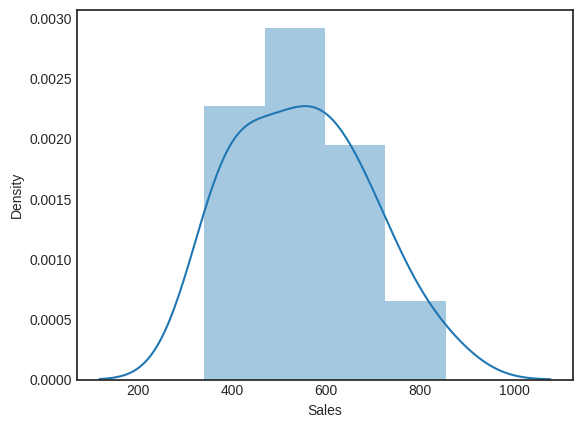

In [ ]:
sns.distplot(df['Sales'])

#### Visualize Quarterly trends


Create quarterly subplots to visualize the data in each quarter across all years

In [16]:
df.head()

,Sales,year,quarter
Date,,,
3/31/2012,0.362,2012,1
6/30/2012,0.385,2012,2
9/30/2012,0.432,2012,3
12/31/2012,0.341,2012,4
3/31/2013,0.382,2013,1


<Figure size 1000x800 with 0 Axes>

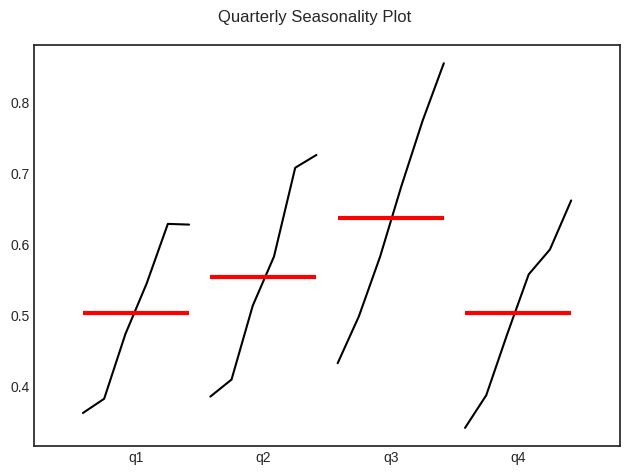

In [17]:
# YOUR CODE HERE
fig = plt.figure(figsize=(10, 8))
df.index = pd.to_datetime(df.index)
quarter_plot(df["Sales"])
plt.suptitle('Quarterly Seasonality Plot')
plt.tight_layout()
plt.show()

In [18]:
for year in np.unique(df["year"]):
    print("Year : ", year)
    print(df[df["year"]==year])
    print("\n")

Year :  2012
            Sales  year  quarter
Date                            
2012-03-31  0.362  2012        1
2012-06-30  0.385  2012        2
2012-09-30  0.432  2012        3
2012-12-31  0.341  2012        4


Year :  2013
            Sales  year  quarter
Date                            
2013-03-31  0.382  2013        1
2013-06-30  0.409  2013        2
2013-09-30  0.498  2013        3
2013-12-31  0.387  2013        4


Year :  2014
            Sales  year  quarter
Date                            
2014-03-31  0.473  2014        1
2014-06-30  0.513  2014        2
2014-09-30  0.582  2014        3
2014-12-31  0.474  2014        4


Year :  2015
            Sales  year  quarter
Date                            
2015-03-31  0.544  2015        1
2015-06-30  0.582  2015        2
2015-09-30  0.681  2015        3
2015-12-31  0.557  2015        4


Year :  2016
            Sales  year  quarter
Date                            
2016-03-31  0.628  2016        1
2016-06-30  0.707  2016        2
201

#### Visualize the distribution of Sales in each year within a single plot

- Do the distribution peaks shift to the right from 2012 to 2017? What does this indicate?
- Is there a change in the width of the distributions from 2012 to 2017? What does it signify?

Hint: `sns.distplot(hist=False)`

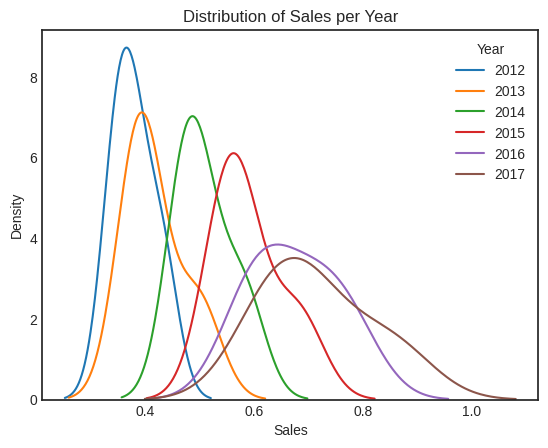

In [19]:
years = df['year'].unique()
for year in years:
    sns.distplot(df[df['year'] == year]['Sales'], hist=False, label=year)

plt.title('Distribution of Sales per Year')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.legend(title='Year')
plt.show()

Do the distribution peaks shift to the right from 2012 to 2017? What does this indicate? --> Yes peaks shift towards right - it indicates upward trend over the year


Is there a change in the width of the distributions from 2012 to 2017? What does it signify? - Wider means more variance in latter years.

#### Visualize the quarterly sales for each year using a stacked bar plot

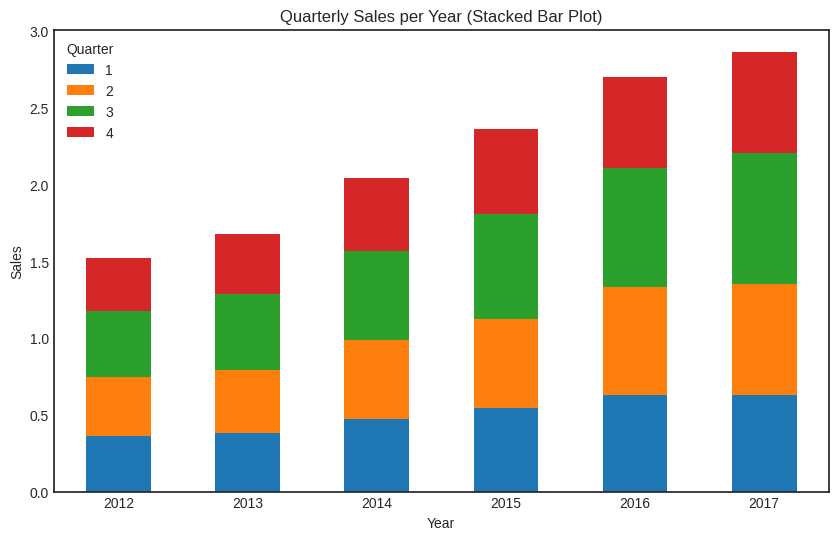

In [20]:
df_pivot = df.pivot(index='year', columns='quarter', values='Sales')

# Create stacked bar plot
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Quarterly Sales per Year (Stacked Bar Plot)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.legend(title='Quarter')
plt.show()

#### Check if the time series data is stationary

Hint:

For the series to be stationary, it must have:
 - constant mean
 - constant variance
 - constant covariance (uncorrelated)

Visualize if the mean is constant

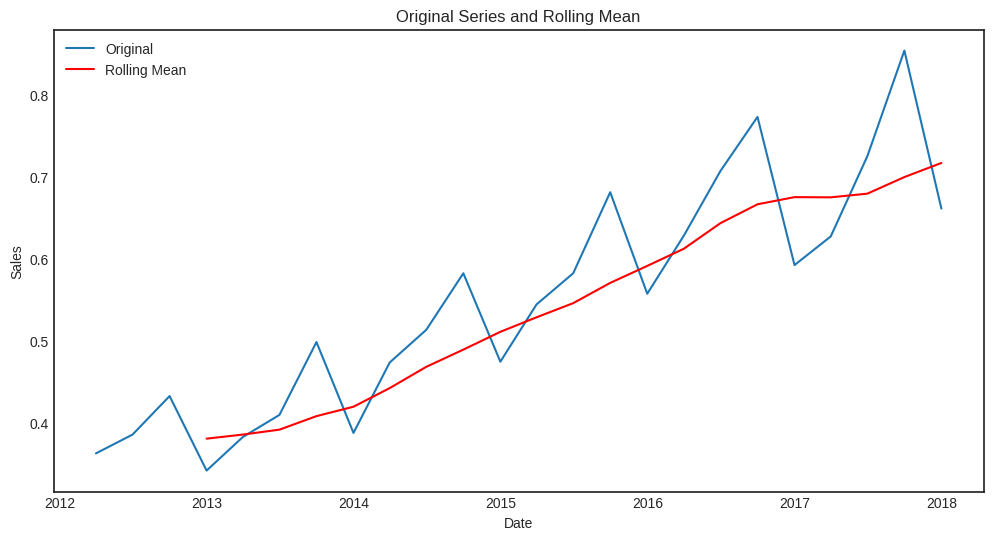

In [21]:
rolling_mean = df['Sales'].rolling(window=4).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Original')
plt.plot(df.index, rolling_mean, color='red', label='Rolling Mean')
plt.title('Original Series and Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

Visualize if the variance is constant

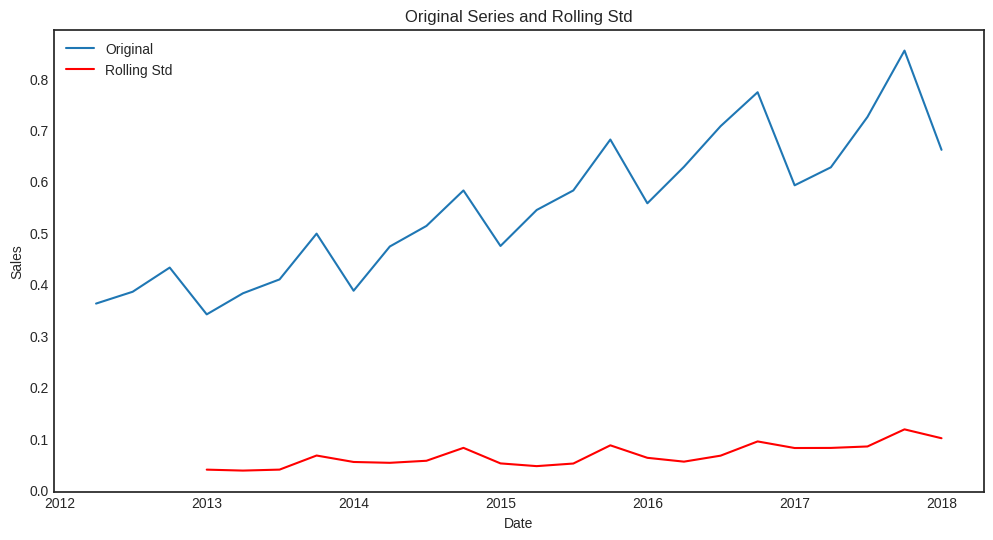

In [22]:
rolling_std = df['Sales'].rolling(window=4).std()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Original')
plt.plot(df.index, rolling_std, color='red', label='Rolling Std')
plt.title('Original Series and Rolling Std')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

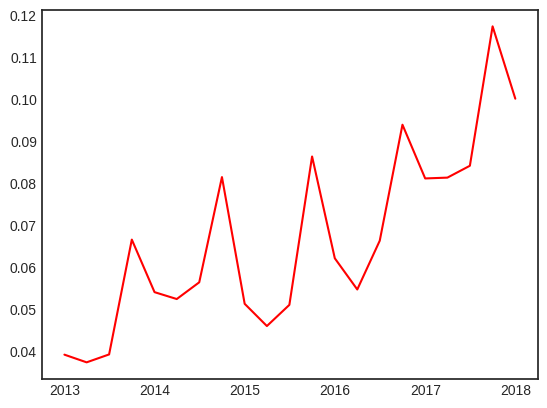

In [23]:
plt.plot(df.index, rolling_std, color='red', label='Rolling Std')

Based on the observations report whether the series is stationary or not. - No

1. Rolling mean shows upward trend and hence mean is not contants
2. Rolling standard deviation also increasing and not varying within any limits - non constant variance

time series is not stationary
constant mean - failed
constant variance - failed

#### Visualize the patterns in time series - trend, seasonality, residuals

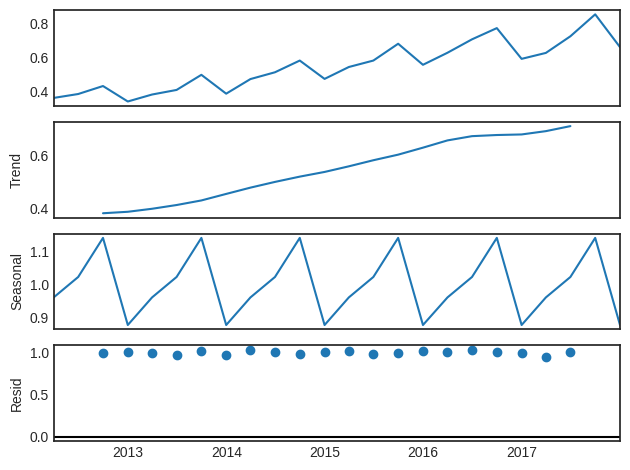

In [25]:
# Applying seasonal decompose
result = seasonal_decompose(df[["Sales"]], model='multiplicative')

# Plotting trend, seasonality
result.plot()
plt.show()

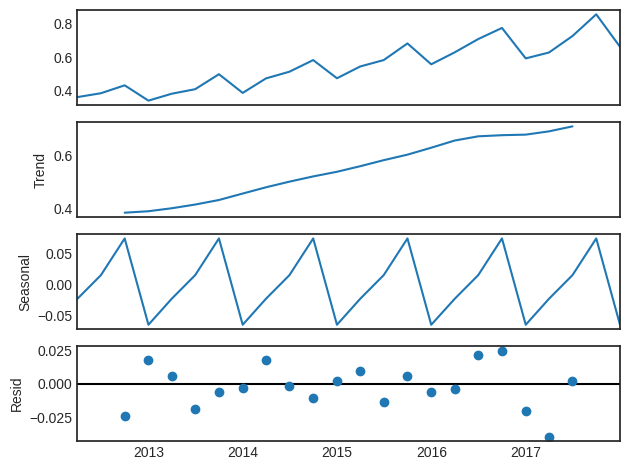

In [26]:
# Applying seasonal decompose
result = seasonal_decompose(df[["Sales"]], model='additive')

# Plotting trend, seasonality
result.plot()
plt.show()

Report if there are any observable patterns in terms of trend, seasonality , or cyclic behavior.

--> upward trend
--> increase from Q1 till Q3 and sudden decline in Q4

using additive because seasonality variation is constant

### **Detrending**

####  Detrend the time series

Text(0.5, 1.0, 'Sales detrended by subtracting the least squares fit')

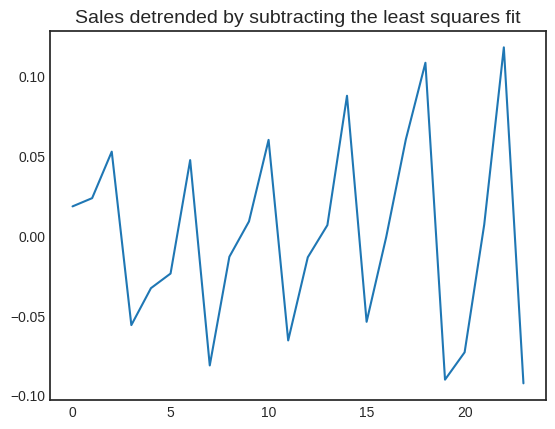

In [27]:

# Using scipy: Subtract the line of best fit
detrended = signal.detrend(df.Sales.values)
plt.plot(detrended)
plt.title('Sales detrended by subtracting the least squares fit', fontsize=14)

## Another way by subtracting the trend value after decomposing

Text(0.5, 1.0, 'Sales detrended by subtracting the trend component')

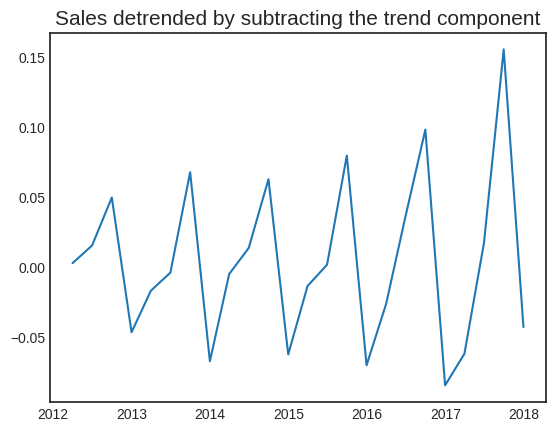

In [28]:
result_add = seasonal_decompose(df['Sales'], model='additive', extrapolate_trend='freq')
# Detrending the time-series by trend component
detrended_v2 = df.Sales.values - result_add.trend

# Plotting the detrended time series
plt.plot(detrended_v2)
plt.title('Sales detrended by subtracting the trend component', fontsize=15)

Text(0.5, 1.0, 'Sales detrended by subtracting the trend component')

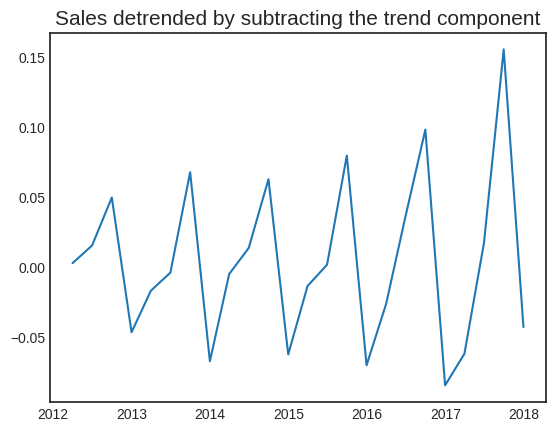

In [29]:
result_mul = seasonal_decompose(df['Sales'], model='multiplicative', extrapolate_trend='freq')
# Detrending the time-series by trend component
detrended_v3 = df.Sales.values - result_mul.trend

# Plotting the detrended time series
plt.plot(detrended_v3)
plt.title('Sales detrended by subtracting the trend component', fontsize=15)

In [30]:
result_mul.trend.head()

,trend
Date,
2012-03-31,0.359525
2012-06-30,0.369875
2012-09-30,0.382500
2012-12-31,0.388000
2013-03-31,0.399250


In [31]:
result_add.trend.head()

,trend
Date,
2012-03-31,0.359525
2012-06-30,0.369875
2012-09-30,0.382500
2012-12-31,0.388000
2013-03-31,0.399250


### Remove Seasonality

Text(0.5, 1.0, 'Sales detrended by subtracting the seasonal component')

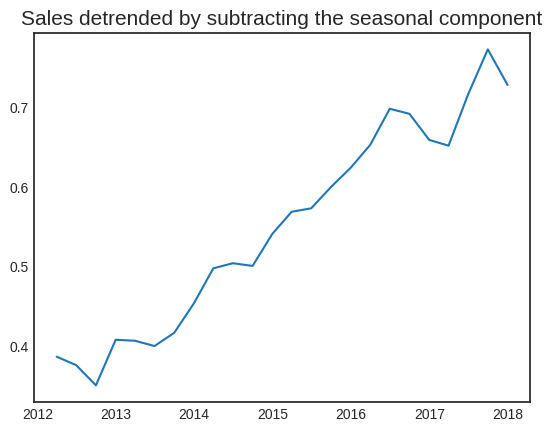

In [32]:
result_add = seasonal_decompose(df['Sales'], model='additive', extrapolate_trend='freq')
# Detrending the time-series by trend component
detrended_v2 = df.Sales.values - result_add.seasonal

# Plotting the detrended time series
plt.plot(detrended_v2)
plt.title('Sales detrended by subtracting the seasonal component', fontsize=15)

Text(0.5, 1.0, 'Sales detrended by subtracting the seasonal component')

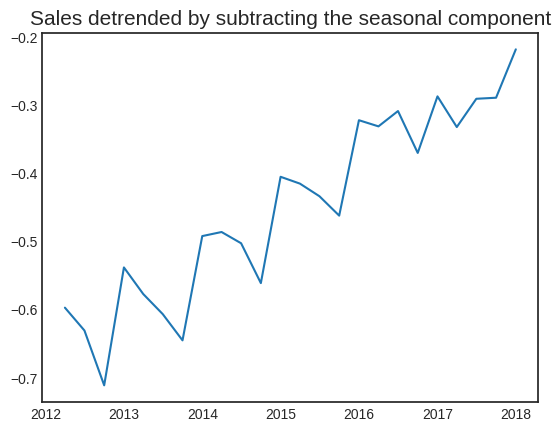

In [33]:
result_mul = seasonal_decompose(df['Sales'], model='multiplicative', extrapolate_trend='freq')
# Detrending the time-series by trend component
detrended_v3 = df.Sales.values - result_mul.seasonal

# Plotting the detrended time series
plt.plot(detrended_v3)
plt.title('Sales detrended by subtracting the seasonal component', fontsize=15)

In [ ]:
result_mul.seasonal.head()

,seasonal
Date,
2012-03-31,0.959880
2012-06-30,1.016402
2012-09-30,1.143855
2012-12-31,0.879863
2013-03-31,0.959880


In [ ]:
result_add.seasonal.head()

,seasonal
Date,
2012-03-31,-24.351563
2012-06-30,9.298437
2012-09-30,81.648438
2012-12-31,-66.595312
2013-03-31,-24.351563


### **Lag Plots**

#### Visualize the Lag plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise

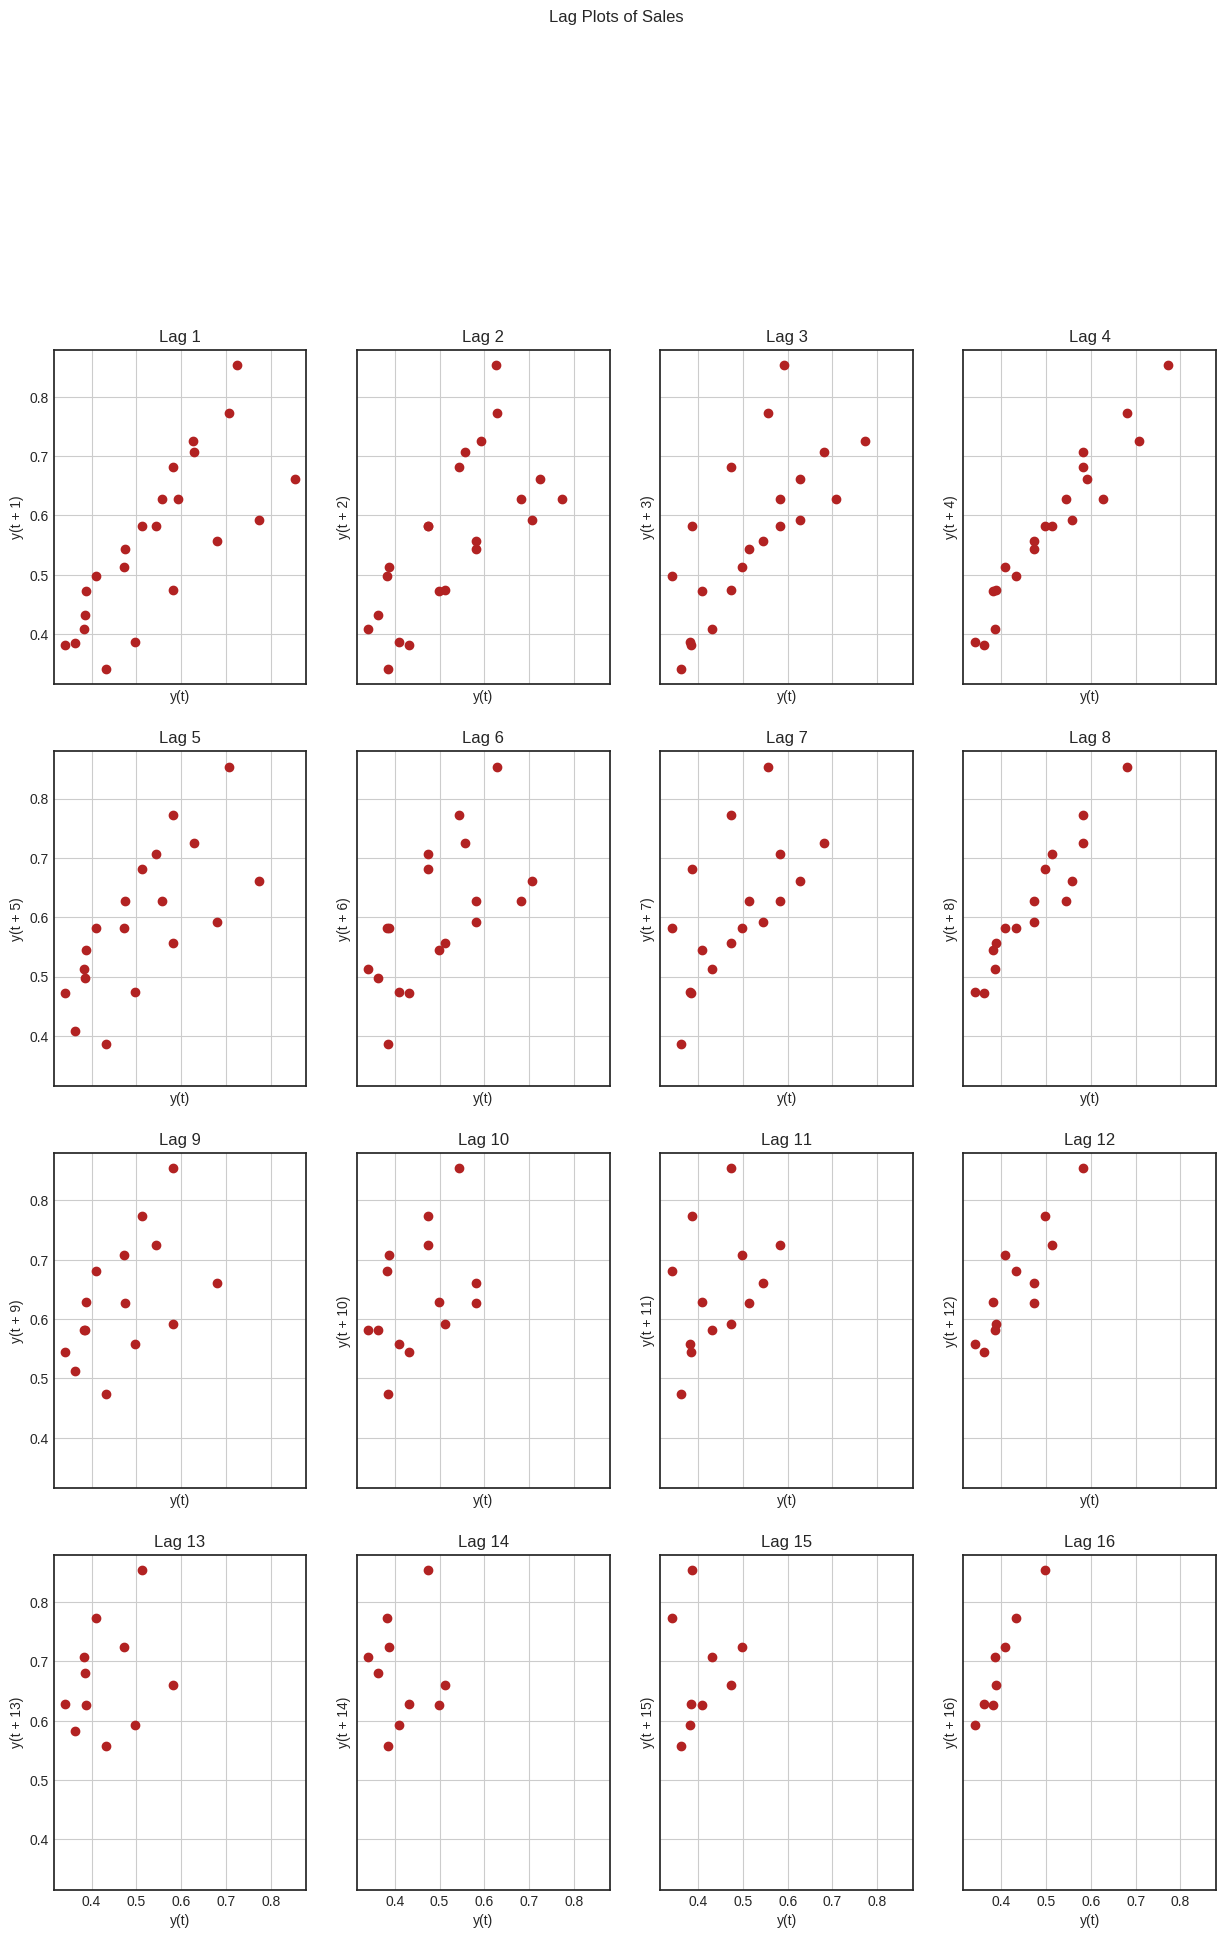

In [34]:
fig, axes = plt.subplots(4, 4, figsize=(15,20), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:16]):
    lag_plot(df.Sales, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))
    ax.grid(True)

fig.suptitle('Lag Plots of Sales', y=1.05)
plt.show()

### Report Analysis

Time series has clear upward and seasonality
Lag 1 - around the diagonal line - shows positively correlated

Lag 2 - still around the diagonal line but little noisy but have weak correlation between y and y(t+2)

Lag 3 : more noisy and hence less correlation

Lag 4 : again diagonal structure - so more correlated - seasonal pattern

Other details:

1)The time series is non-stationary due to trend and seasonality, but can be made stationary with detrending and/or differencing.

2)The business seems to have seasonal strength in Q3, which can be strategically leveraged for marketing, staffing, and inventory planning.